# **Setup**

In [69]:
!pip install pythainlp
!pip install tensorflow
!pip install scikit-learn

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library
---

In [71]:
from tensorflow import keras

import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from keras.layers import LSTM, Embedding, Dense, Bidirectional
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

---
### Prepare Data {Tokenize Word}
---

In [72]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Change 'acc' to 'accuracy'
    val_acc = history.history['val_accuracy']  # Change 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [73]:
def plot_confusion_metrix(cm) :
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)

    plt.show()

In [74]:
data = pd.read_csv("/content/drive/MyDrive/NLP_Elder_Companion.csv")
text = np.array(data["Text"].apply(word_tokenize, engine="newmm", keep_whitespace=False).values)
_class = np.array(data["Class"].values)

words_list = {}
max_len_sentence = 0
i = 1

for sentence in text:
    if max_len_sentence < len(sentence) :
        max_len_sentence = len(sentence)

    for word in sentence:
        if words_list.get(word) == None:
            words_list[word] = i
            i += 1

max_vocab = len(words_list)
word_sequence = copy.deepcopy(text)

for i in range(len(word_sequence)) :
    for j in range(len(word_sequence[i])) :
        word_sequence[i][j] = words_list[text[i][j]]

x = pad_sequences(word_sequence, maxlen=max_len_sentence, padding='post')
y = to_categorical(_class, num_classes=9)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=7)

Epoch 1/20
6/6 [==============================] - 7s 481ms/step - loss: 2.1892 - accuracy: 0.1160 - val_loss: 2.1298 - val_accuracy: 0.2418
Epoch 2/20
6/6 [==============================] - 1s 107ms/step - loss: 2.0734 - accuracy: 0.3287 - val_loss: 1.9526 - val_accuracy: 0.3187
Epoch 3/20
6/6 [==============================] - 1s 155ms/step - loss: 1.8843 - accuracy: 0.4448 - val_loss: 1.4870 - val_accuracy: 0.4396
Epoch 4/20
6/6 [==============================] - 1s 145ms/step - loss: 1.4513 - accuracy: 0.5801 - val_loss: 1.3354 - val_accuracy: 0.4505
Epoch 5/20
6/6 [==============================] - 1s 84ms/step - loss: 1.1572 - accuracy: 0.5718 - val_loss: 1.0853 - val_accuracy: 0.6044
Epoch 6/20
6/6 [==============================] - 1s 133ms/step - loss: 0.8041 - accuracy: 0.7569 - val_loss: 0.8847 - val_accuracy: 0.6923
Epoch 7/20
6/6 [==============================] - 1s 118ms/step - loss: 0.5281 - accuracy: 0.8674 - val_loss: 0.6184 - val_accuracy: 0.8242
Epoch 8/20
6/6 [=====

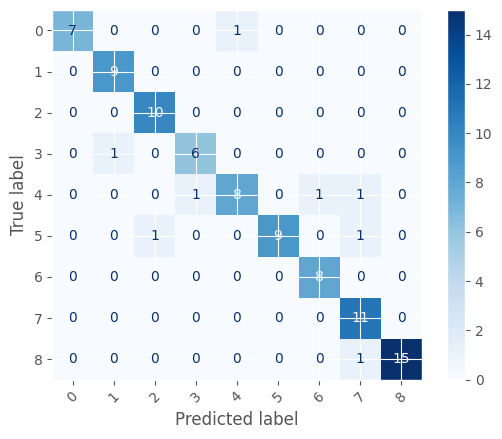


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.90      1.00      0.95         9
           2       0.91      1.00      0.95        10
           3       0.86      0.86      0.86         7
           4       0.89      0.73      0.80        11
           5       1.00      0.82      0.90        11
           6       0.89      1.00      0.94         8
           7       0.79      1.00      0.88        11
           8       1.00      0.94      0.97        16

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.92      0.91      0.91        91



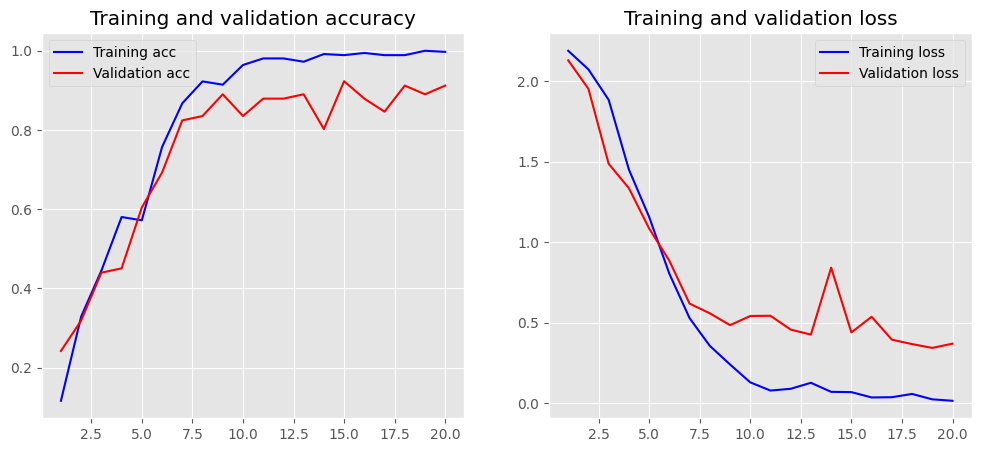

In [92]:
model = Sequential()
model.add(Embedding(input_dim=max_vocab,
                    output_dim=500,
                    input_length=max_len_sentence))
model.add(Bidirectional(LSTM(500)))
model.add(Dense(9, activation="softmax"))

lost_func = CategoricalCrossentropy()
otm = Adam(learning_rate=0.00091)
model.compile(optimizer=otm, loss=lost_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=69, epochs=20, verbose=1)

y_predict = model.predict(x_test)
print(model.evaluate(x_test, y_test, verbose=1))
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_predict)
report = classification_report(np.argmax(y_test, axis=1), y_predict)
print("Confusion Matrix:")
plot_confusion_metrix(cm)

print("\nClassification Report:")
print(report)

plot_history(history)

In [95]:
input_word = "หิวมากแนะนำอะไรให้กินน่อย"

input_sequence = word_tokenize(input_word, engine="newmm", keep_whitespace=False)

for i in range(len(input_sequence)) :
    if words_list.get(input_sequence[i]) != None :
        input_sequence[i] = words_list[input_sequence[i]]
    else :
        input_sequence[i] = 0

input_sequence = np.array([input_sequence])

input_data = pad_sequences(input_sequence, maxlen=max_len_sentence, padding='post')
logit = model.predict(input_data, batch_size=32)
predict = [pred for pred in np.argmax(logit,axis=1)][0]
print(predict)

1/1 [==============================] - 0s 29ms/step
0
